In [1]:
#C:\Users\abdel\Desktop\Year 4 Indiv. project\dataset_of_sounds\PlantSounds\Tomato Dry

import os
import scipy.io.wavfile as wavfile
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns   

In [2]:
## intesity of sounds
def intensity_analysis(file_path):
    # Read the wav file
    sample_rate, data = wavfile.read(file_path)

    # Perform FFT
    fft_result = np.fft.rfft(data)
    fft_freq = np.fft.rfftfreq(len(data), 1/sample_rate)

    # Find the peak frequency
    peak, _ = find_peaks(np.abs(fft_result), distance=sample_rate/2)
    max_freq = fft_freq[peak]

    # Take the maximum frequency if there are multiple peaks
    if max_freq.size > 0:
        max_freq = np.max(max_freq)
    else:
        max_freq = np.nan

    #max intensity calculation 
    # Convert all values in data to absolute values
    data_abs = np.abs(data)

    # Find the maximum value (intensity)
    intensitybit = np.max(data_abs)

    return max_freq, intensitybit

# Directory containing the .wav files
directory = 'C:/Users/abdel/Desktop/Year 4 Indiv. project/dataset_of_sounds/PlantSounds/Tomato Dry'

# Get a list of all .wav files in the directory
wav_files = [f for f in os.listdir(directory) if f.endswith('.wav')]

# Initialize an empty DataFrame to store the results
df = pd.DataFrame(columns=['File', 'Max Frequency', 'intensitybit'])

# Loop over the .wav files
for wav_file in wav_files:
    # Perform FFT on the wav file
    #max_freq, bandwidth, spectral_centroid, energy_entropy = perform_fft(os.path.join(directory, wav_file))
    max_freq, intensitybit = intensity_analysis(os.path.join(directory, wav_file))
    #print(type(max_freq))
    # Append the results to the DataFrame
    df = df.append({'File': wav_file,
                    'Max Frequency': max_freq,
                    'intensitybit': intensitybit}, ignore_index=True)
    



In [3]:
df

,File,Max Frequency,intensitybit
0,id_101_sound_1.wav,31468.531469,3489
1,id_101_sound_10.wav,30469.530470,8211
2,id_101_sound_11.wav,60939.060939,5093
3,id_101_sound_12.wav,31468.531469,5871
4,id_101_sound_13.wav,68931.068931,11407
...,...,...,...
1617,id_9_sound_4.wav,51948.051948,8349
1618,id_9_sound_5.wav,57442.557443,9279
1619,id_9_sound_6.wav,61438.561439,2717
1620,id_9_sound_7.wav,58941.058941,12247


In [4]:
#intensity average
intensity_avg = df['intensitybit'].mean()
print("intensity_avg",intensity_avg)

intensity_avg 8484.840937114674


In [8]:
average_intensity_dB_SPL = 61.6
# Add a small constant to the denominator to prevent division by zero
df['intensitybit'] = df['intensitybit'].replace(0, np.finfo(float).eps)

# Calculate the reference intensity
reference_intensity = intensity_avg / 10**(average_intensity_dB_SPL / 20)

# Convert all intensities from quantized value to dB SPL
df['intensity_dB_SPL'] = df['intensitybit'].apply(lambda x: 20 * np.log10(x / (reference_intensity + np.finfo(float).eps)) if np.isfinite(x / (reference_intensity + np.finfo(float).eps)) else 0)

df

,File,Max Frequency,intensitybit,intensity_dB_SPL
0,id_101_sound_1.wav,31468.531469,3489,53.881145
1,id_101_sound_10.wav,30469.530470,8211,61.315047
2,id_101_sound_11.wav,60939.060939,5093,57.166599
3,id_101_sound_12.wav,31468.531469,5871,58.401368
4,id_101_sound_13.wav,68931.068931,11407,64.170555
...,...,...,...,...
1617,id_9_sound_4.wav,51948.051948,8349,61.459815
1618,id_9_sound_5.wav,57442.557443,9279,62.377149
1619,id_9_sound_6.wav,61438.561439,2717,51.708919
1620,id_9_sound_7.wav,58941.058941,12247,64.787720


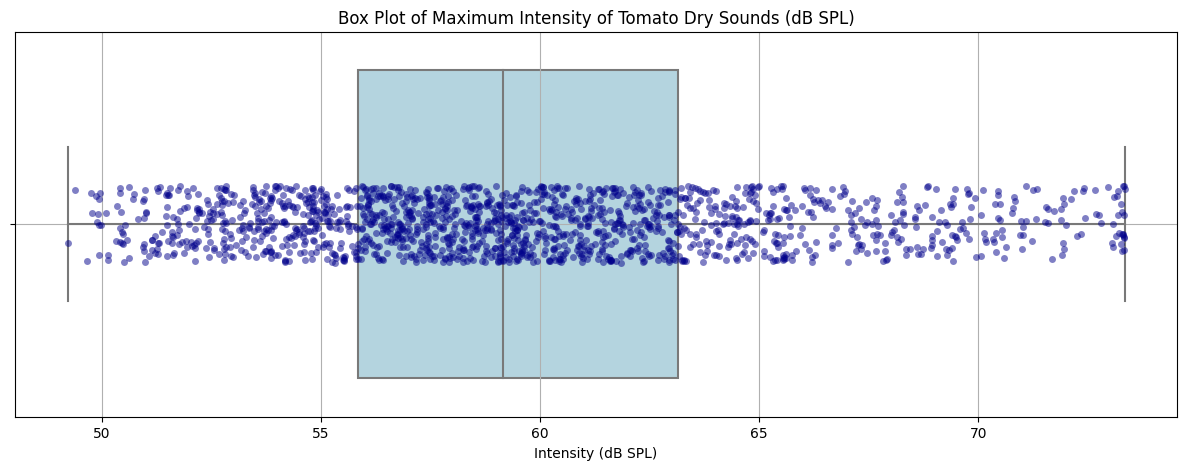

Standard deviation of Intensity: 5.410509263606058
Average Intensity: 59.78553447070642
Intensity (dB SPL):
Median: 59.16
Q1: 55.85
Q3: 63.16
Whisker low: 44.88
Whisker high: 74.12
Maximum Intensity: 73.3332083114941
Minimum Intensity: 49.223985991609055


In [25]:
# Create a new figure
plt.figure(figsize=(15, 5))

# Plot the box plot of 'intensity_dB_SPL'
sns.boxplot(x=df['intensity_dB_SPL'], color='lightblue')

# Add the data points on the boxplot
sns.stripplot(x=df['intensity_dB_SPL'], color='darkblue', alpha=0.5)

plt.xlabel('Intensity (dB SPL)')
plt.title('Box Plot of Maximum Intensity of Tomato Dry Sounds (dB SPL)')
plt.grid(True)
# Show the plot
plt.show()
# Calculate the boxplot components for 'intensity_dB_SPL'
q1_intensity = df['intensity_dB_SPL'].quantile(0.25)
median_intensity = df['intensity_dB_SPL'].median()
q3_intensity = df['intensity_dB_SPL'].quantile(0.75)
iqr_intensity = q3_intensity - q1_intensity
whisker_low_intensity = q1_intensity - 1.5 * iqr_intensity
whisker_high_intensity = q3_intensity + 1.5 * iqr_intensity
average_intensity = df['intensity_dB_SPL'].mean()
std_dev_intensity = df['intensity_dB_SPL'].std()

# Print the components for 'intensity_dB_SPL'
print(f'Standard deviation of Intensity: {std_dev_intensity}')
print(f'Average Intensity: {average_intensity}')
print("Intensity (dB SPL):")
print(f'Median: {median_intensity:.2f}')
print(f'Q1: {q1_intensity:.2f}')
print(f'Q3: {q3_intensity:.2f}')
print(f'Whisker low: {whisker_low_intensity:.2f}')
print(f'Whisker high: {whisker_high_intensity:.2f}')
# Calculate the maximum and minimum of 'intensity_dB_SPL'
max_intensity = df['intensity_dB_SPL'].max()
min_intensity = df['intensity_dB_SPL'].min()

# Print the maximum and minimum
print(f'Maximum Intensity: {max_intensity}')
print(f'Minimum Intensity: {min_intensity}')

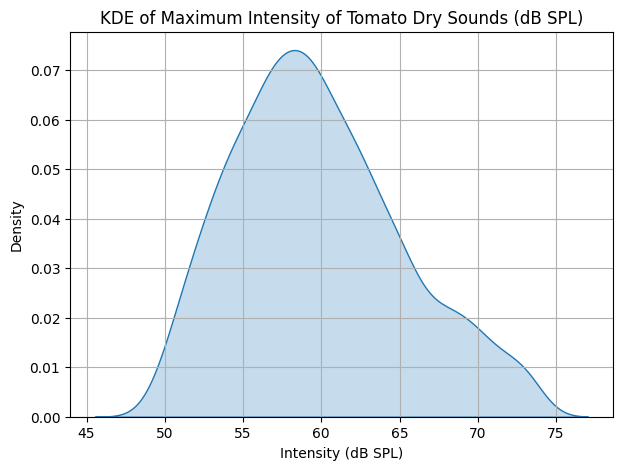

In [22]:
# Create a new figure
plt.figure(figsize=(7, 5))

# Plot the KDE of 'intensity_dB_SPL'
sns.kdeplot(df['intensity_dB_SPL'], fill=True)
plt.xlabel('Intensity (dB SPL)')
plt.title('KDE of Maximum Intensity of Tomato Dry Sounds (dB SPL)')
plt.grid(True)
# Show the plot
plt.show()

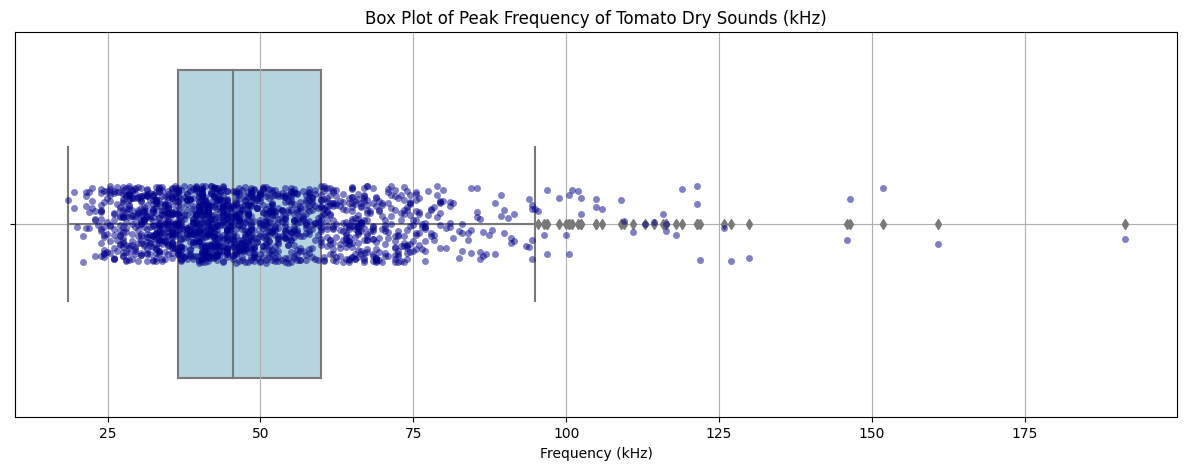

Standard deviation of Max Frequency: 18.516565929862686
Average Max Frequency: 49.51552762896783
Max Frequency (kHz):
Median: 45.45
Q1: 36.46
Q3: 59.94
Whisker low: 1.25
Whisker high: 95.15
Maximum Frequency: 191.30869130869132
Minimum Frequency: 18.481518481518485


In [23]:
df['Max Frequency (kHz)'] = df['Max Frequency'] / 1000

# Create a new figure
plt.figure(figsize=(15, 5))

# Plot the box plot of 'Max Frequency (kHz)'
sns.boxplot(x=df['Max Frequency (kHz)'], color='lightblue')

# Add the data points on the boxplot
sns.stripplot(x=df['Max Frequency (kHz)'], color='darkblue', alpha=0.5)

plt.xlabel('Frequency (kHz)')
plt.title('Box Plot of Peak Frequency of Tomato Dry Sounds (kHz)')
plt.grid(True)
# Show the plot
plt.show()

# Calculate the boxplot components for 'Max Frequency (kHz)'
q1_frequency = df['Max Frequency (kHz)'].quantile(0.25)
median_frequency = df['Max Frequency (kHz)'].median()
q3_frequency = df['Max Frequency (kHz)'].quantile(0.75)
iqr_frequency = q3_frequency - q1_frequency
whisker_low_frequency = q1_frequency - 1.5 * iqr_frequency
whisker_high_frequency = q3_frequency + 1.5 * iqr_frequency
average_frequency = df['Max Frequency (kHz)'].mean()
std_dev_frequency = df['Max Frequency (kHz)'].std()

# Print the components for 'Max Frequency (kHz)'
print(f'Standard deviation of Max Frequency: {std_dev_frequency}')
print(f'Average Max Frequency: {average_frequency}')
print("Max Frequency (kHz):")
print(f'Median: {median_frequency:.2f}')
print(f'Q1: {q1_frequency:.2f}')
print(f'Q3: {q3_frequency:.2f}')
print(f'Whisker low: {whisker_low_frequency:.2f}')
print(f'Whisker high: {whisker_high_frequency:.2f}')

# Calculate the maximum and minimum of 'Max Frequency (kHz)'
max_frequency = df['Max Frequency (kHz)'].max()
min_frequency = df['Max Frequency (kHz)'].min()

# Print the maximum and minimum
print(f'Maximum Frequency: {max_frequency}')
print(f'Minimum Frequency: {min_frequency}')

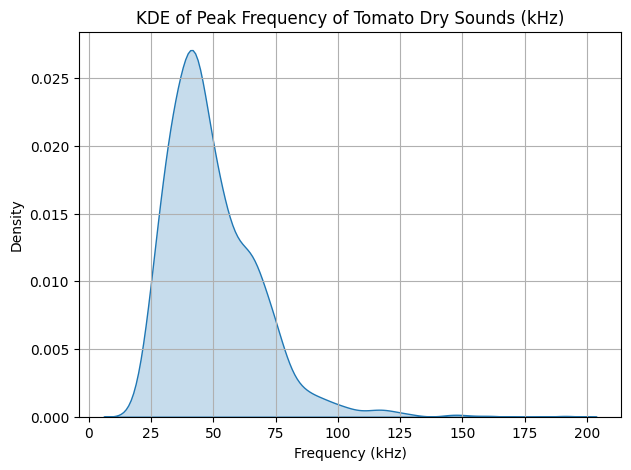

In [24]:
# Create a new figure
plt.figure(figsize=(7, 5))

# Plot the KDE of 'intensity_dB_SPL'
sns.kdeplot(df['Max Frequency (kHz)'], fill=True)
plt.xlabel('Frequency (kHz)')
plt.title('KDE of Peak Frequency of Tomato Dry Sounds (kHz)')
plt.grid(True)
# Show the plot
plt.show()

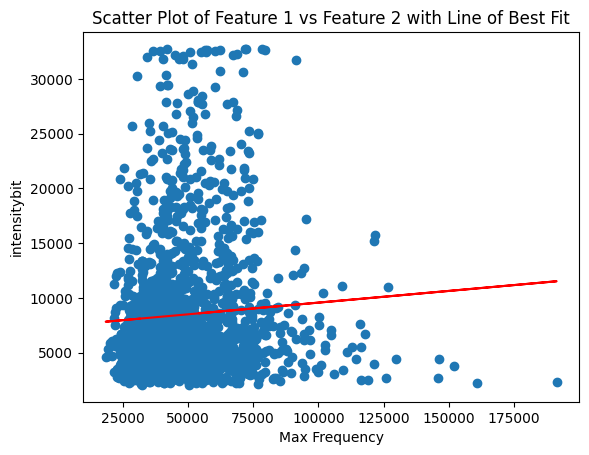

In [5]:
import numpy as np


# Fit a line to the data
coefficients = np.polyfit(df['Max Frequency'], df['intensitybit'], 1)
polynomial = np.poly1d(coefficients)

# Create a scatter plot of 'feature1' and 'feature2'
plt.scatter(df['Max Frequency'], df['intensitybit'])
plt.plot(df['Max Frequency'], polynomial(df['Max Frequency']), color='red')

plt.xlabel('Max Frequency')
plt.ylabel('intensitybit')
plt.title('Scatter Plot of Feature 1 vs Feature 2 with Line of Best Fit')
plt.show()

In [ ]:
# Calculate the average of the 'intensitybit' column
average_intensity = df['intensitybit'].mean()
avg_ref= 61.6 


Standard deviation of Max Frequency: 18.516565929862686
Average Max Frequency: 49.51552762896783
Max Frequency:
Median: 45.45
Q1: 36.46
Q3: 59.94
Whisker low: 1.25
Whisker high: 95.15
Maximum Intensity: 191.30869130869132
Minimum Intensity: 18.481518481518485


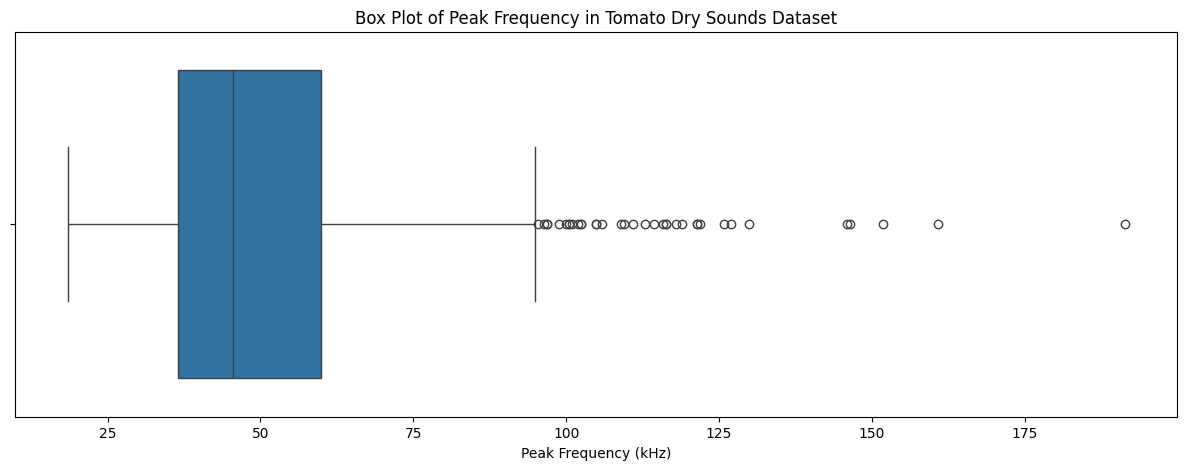

In [9]:

df['Max Frequency (kHz)'] = df['Max Frequency'] / 1000
# Create a new figure
plt.figure(figsize=(15, 5))

# Plot the box plot of 'Max Frequency'
sns.boxplot(x=df['Max Frequency (kHz)'])
plt.xlabel('Peak Frequency (kHz)')
plt.title('Box Plot of Peak Frequency in Tomato Dry Sounds Dataset')

# Calculate the boxplot components for 'Max Frequency'
q1_max_freq = df['Max Frequency (kHz)'].quantile(0.25)
median_max_freq = df['Max Frequency (kHz)'].median()
q3_max_freq = df['Max Frequency (kHz)'].quantile(0.75)
iqr_max_freq = q3_max_freq - q1_max_freq
whisker_low_max_freq = q1_max_freq - 1.5 * iqr_max_freq
whisker_high_max_freq = q3_max_freq + 1.5 * iqr_max_freq
average_max_frequency = df['Max Frequency (kHz)'].mean()
std_dev_max_freq = df['Max Frequency (kHz)'].std()
print(f'Standard deviation of Max Frequency: {std_dev_max_freq}')
print(f'Average Max Frequency: {average_max_frequency}')
# Print the components for 'Max Frequency'
print("Max Frequency:")
print(f'Median: {median_max_freq:.2f}')
print(f'Q1: {q1_max_freq:.2f}')
print(f'Q3: {q3_max_freq:.2f}')
print(f'Whisker low: {whisker_low_max_freq:.2f}')
print(f'Whisker high: {whisker_high_max_freq:.2f}')

max_freq = df['Max Frequency (kHz)'].max()
min_freq = df['Max Frequency (kHz)'].min()

# Print the maximum and minimum
print(f'Maximum Intensity: {max_freq}')
print(f'Minimum Intensity: {min_freq}')

C:\Users\abdel\AppData\Local\Temp\ipykernel_16412\490041738.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Max Frequency (kHz)'], shade=True)


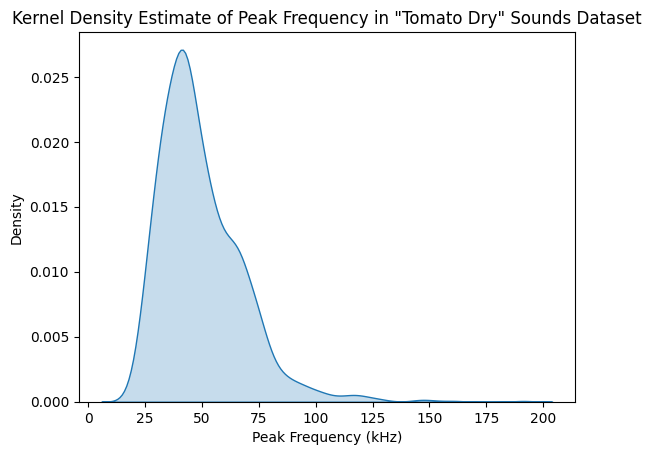

In [15]:
import seaborn as sns

sns.kdeplot(df['Max Frequency (kHz)'], shade=True)
plt.xlabel('Peak Frequency (kHz)')
plt.title('Kernel Density Estimate of Peak Frequency in "Tomato Dry" Sounds Dataset')
plt.show()

500000


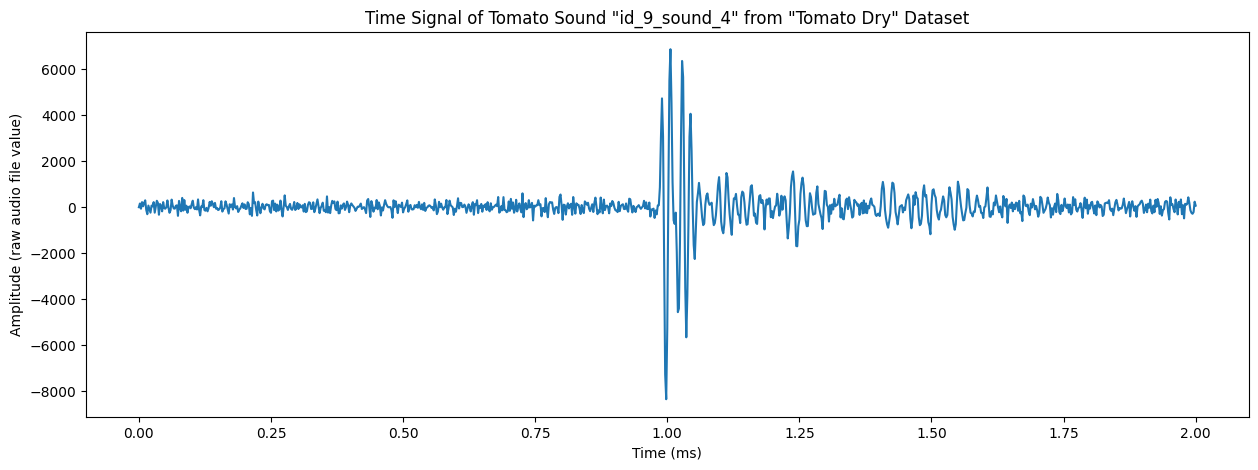

Text(0.5, 1.0, 'Frequency Response of Tomato Sound "id_9_sound_4" from "Tomato Dry" Dataset')

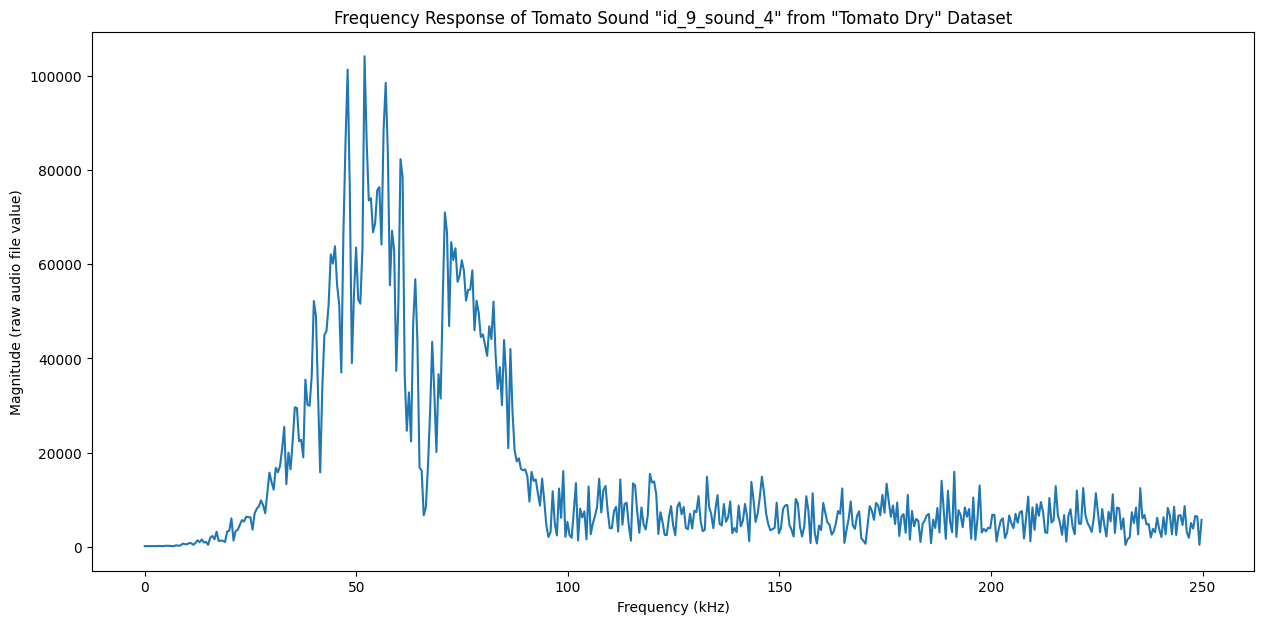

In [28]:
file_path = 'C:/Users/abdel/Desktop/Year 4 Indiv. project/dataset_of_sounds/PlantSounds/Tomato Dry/id_9_sound_4.wav'

# Read the wav file
sample_rate, data = wavfile.read(file_path)
time = np.arange(len(data)) / sample_rate
# Perform FFT
fft_result = np.fft.rfft(data)
fft_freq = np.fft.rfftfreq(len(data), 1/sample_rate)

# Find the peak frequency
peak, _ = find_peaks(np.abs(fft_result), distance=sample_rate/2)
max_freq = fft_freq[peak]

# Take the maximum frequency if there are multiple peaks
if max_freq.size > 0:
    max_freq = np.max(max_freq)
else:
    max_freq = np.nan

print(sample_rate)
plt.figure(figsize=(15, 5))
plt.plot(time*1000, data)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (raw audio file value)')
plt.title('Time Signal of Tomato Sound "id_9_sound_4" from "Tomato Dry" Dataset')
plt.show()

#plot the fft
plt.figure(figsize=(15, 7))
plt.plot(fft_freq/1000, np.abs(fft_result))
plt.xlabel('Frequency (kHz)')
plt.ylabel('Magnitude (raw audio file value)')
plt.title('Frequency Response of Tomato Sound "id_9_sound_4" from "Tomato Dry" Dataset')



In [ ]:
num_nan = df['Energy Entropy'].isna().sum()
print(num_nan)

1622


In [ ]:
print(df['Max Frequency'].dtype)

float64


Max Frequency:
Median: 45454.55
Q1: 36463.54
Q3: 59940.06
Whisker low: 1248.75
Whisker high: 95154.85

Bandwidth:
Median: 999.00
Q1: 999.00
Q3: 999.00
Whisker low: 999.00
Whisker high: 999.00

Spectral Centroid:
Median: 102854.55
Q1: 92130.66
Q3: 113268.17
Whisker low: 60424.40
Whisker high: 144974.44


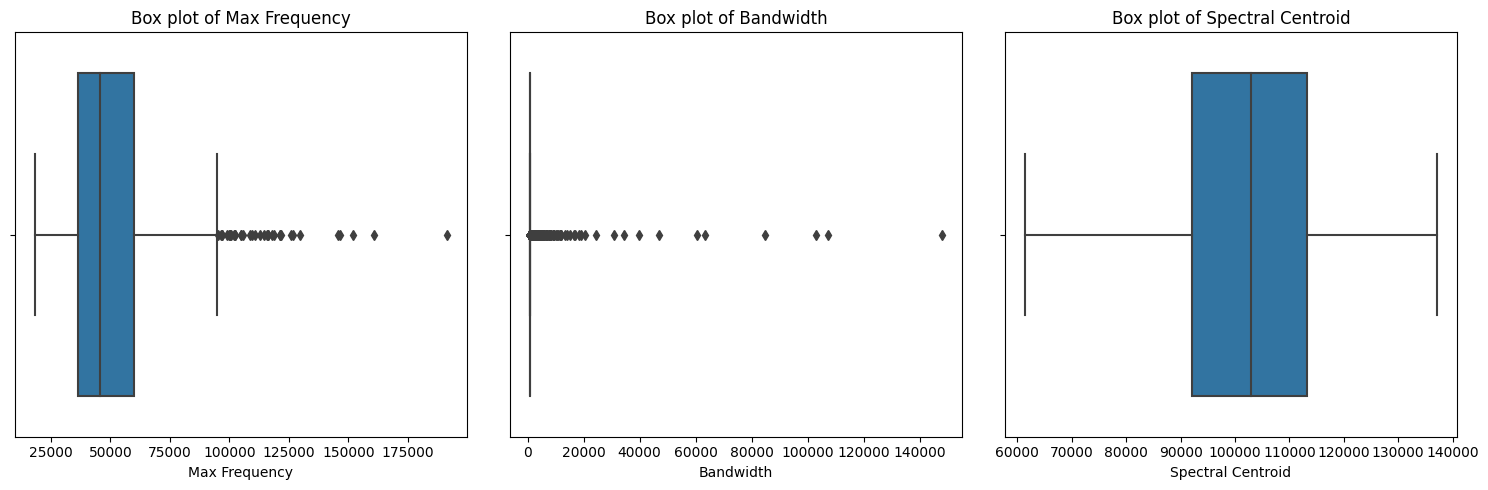

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns   

# Create a new figure
plt.figure(figsize=(15, 5))

# Plot the box plot of 'Max Frequency'
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Max Frequency'])
plt.title('Box plot of Max Frequency')

# Calculate the boxplot components for 'Max Frequency'
q1_max_freq = df['Max Frequency'].quantile(0.25)
median_max_freq = df['Max Frequency'].median()
q3_max_freq = df['Max Frequency'].quantile(0.75)
iqr_max_freq = q3_max_freq - q1_max_freq
whisker_low_max_freq = q1_max_freq - 1.5 * iqr_max_freq
whisker_high_max_freq = q3_max_freq + 1.5 * iqr_max_freq

# Print the components for 'Max Frequency'
print("Max Frequency:")
print(f'Median: {median_max_freq:.2f}')
print(f'Q1: {q1_max_freq:.2f}')
print(f'Q3: {q3_max_freq:.2f}')
print(f'Whisker low: {whisker_low_max_freq:.2f}')
print(f'Whisker high: {whisker_high_max_freq:.2f}')

# Plot the box plot of 'Bandwidth'
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Bandwidth'])
plt.title('Box plot of Bandwidth')

# Calculate the boxplot components for 'Bandwidth'
q1_bandwidth = df['Bandwidth'].quantile(0.25)
median_bandwidth = df['Bandwidth'].median()
q3_bandwidth = df['Bandwidth'].quantile(0.75)
iqr_bandwidth = q3_bandwidth - q1_bandwidth
whisker_low_bandwidth = q1_bandwidth - 1.5 * iqr_bandwidth
whisker_high_bandwidth = q3_bandwidth + 1.5 * iqr_bandwidth

# Print the components for 'Bandwidth'
print("\nBandwidth:")
print(f'Median: {median_bandwidth:.2f}')
print(f'Q1: {q1_bandwidth:.2f}')
print(f'Q3: {q3_bandwidth:.2f}')
print(f'Whisker low: {whisker_low_bandwidth:.2f}')
print(f'Whisker high: {whisker_high_bandwidth:.2f}')

# Plot the box plot of 'Spectral Centroid'
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Spectral Centroid'])
plt.title('Box plot of Spectral Centroid')

# Calculate the boxplot components for 'Spectral Centroid'
q1_spectral_centroid = df['Spectral Centroid'].quantile(0.25)
median_spectral_centroid = df['Spectral Centroid'].median()
q3_spectral_centroid = df['Spectral Centroid'].quantile(0.75)
iqr_spectral_centroid = q3_spectral_centroid - q1_spectral_centroid
whisker_low_spectral_centroid = q1_spectral_centroid - 1.5 * iqr_spectral_centroid
whisker_high_spectral_centroid = q3_spectral_centroid + 1.5 * iqr_spectral_centroid

# Print the components for 'Spectral Centroid'
print("\nSpectral Centroid:")
print(f'Median: {median_spectral_centroid:.2f}')
print(f'Q1: {q1_spectral_centroid:.2f}')
print(f'Q3: {q3_spectral_centroid:.2f}')
print(f'Whisker low: {whisker_low_spectral_centroid:.2f}')
print(f'Whisker high: {whisker_high_spectral_centroid:.2f}')

plt.tight_layout()
plt.show()

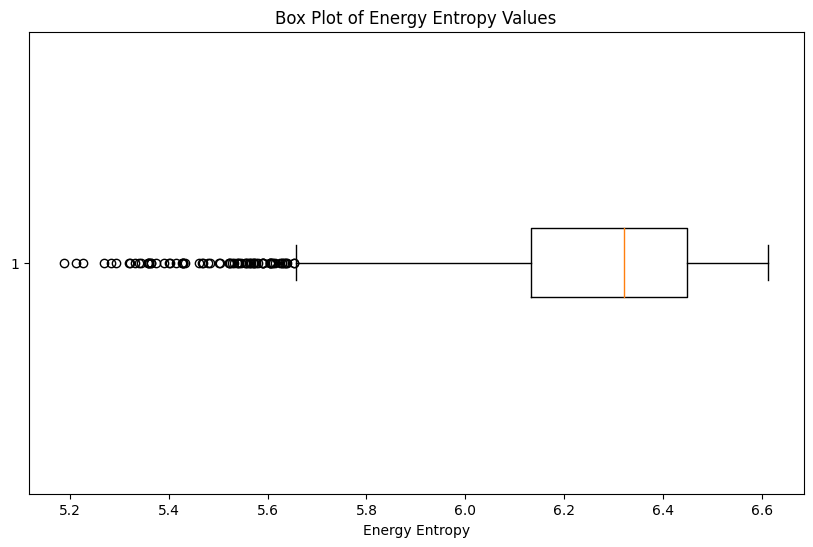

count    1622.000000
mean        6.250053
std         0.270344
min         5.188288
25%         6.131941
50%         6.321498
75%         6.448391
max         6.612427
Name: Energy Entropy, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd



# Create a box plot of the energy entropy values
plt.figure(figsize=(10, 6))
plt.boxplot(df['Energy Entropy'], vert=False)
plt.title('Box Plot of Energy Entropy Values')
plt.xlabel('Energy Entropy')
plt.show()

# Print various statistics of the energy entropy values
print(df['Energy Entropy'].describe())

In [ ]:
average_max_frequency = df['Max Frequency'].mean()
print(f'Average Max Frequency: {average_max_frequency}')

Average Max Frequency: 49515.52762896784


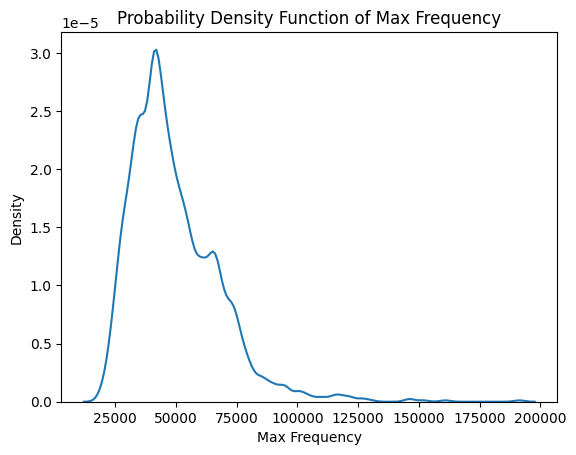

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the PDF of 'Max Frequency'
sns.kdeplot(df['Max Frequency'], bw_adjust=0.5)

plt.title('Probability Density Function of Max Frequency')
plt.xlabel('Max Frequency')
plt.ylabel('Density')

plt.show()